In [11]:
import pandas as pd
import numpy as np
import math,copy,os
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from pathlib import Path
from Measure import measure_final_score,calculate_recall,calculate_precision,calculate_accuracy
import statistics
from CatEncoder import *
import pickle

## Adult preprocess


### 1. Original drop

In [12]:
## Load dataset
from sklearn import preprocessing
dataset_orig = pd.read_csv(Path(r'/Users/germainherbay/PycharmProjects/Blind/data/adult.data.csv'))

# View summary of dataset
print(dataset_orig.head())
print(dataset_orig.shape)

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country Probability  
0          2174             0              40   United-States   

1.1 Drop fnlwgt features

In [13]:
dataset_orig = dataset_orig.drop(['fnlwgt'],axis=1)
dataset_orig = dataset_orig.drop(['education'],axis=1)
print(dataset_orig.columns)

Index(['age', 'workclass', 'education-num', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'Probability'],
      dtype='object')


1.2 Drop missing values

In [14]:
# Replace "?" values
dataset_orig[dataset_orig == ' ?'] = np.nan
print(dataset_orig.isnull().sum())
print("\n")
dataset_orig = dataset_orig.dropna()
print(dataset_orig.isnull().sum())
print(dataset_orig.shape)

age                  0
workclass         2799
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
Probability          0
dtype: int64


age               0
workclass         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Probability       0
dtype: int64
(45222, 13)


1.3 Rename column values

In [15]:
dataset_orig['race'] = np.where(dataset_orig['race'] != ' White', 'Non-white', 'White')

In [16]:
dataset_orig['sex'] = np.where(dataset_orig['sex'] != ' Male', 'Female', 'Male')

In [17]:
dataset_orig['Probability'] = np.where(dataset_orig['Probability'] != ' <=50K', '>50K', '<=50K')

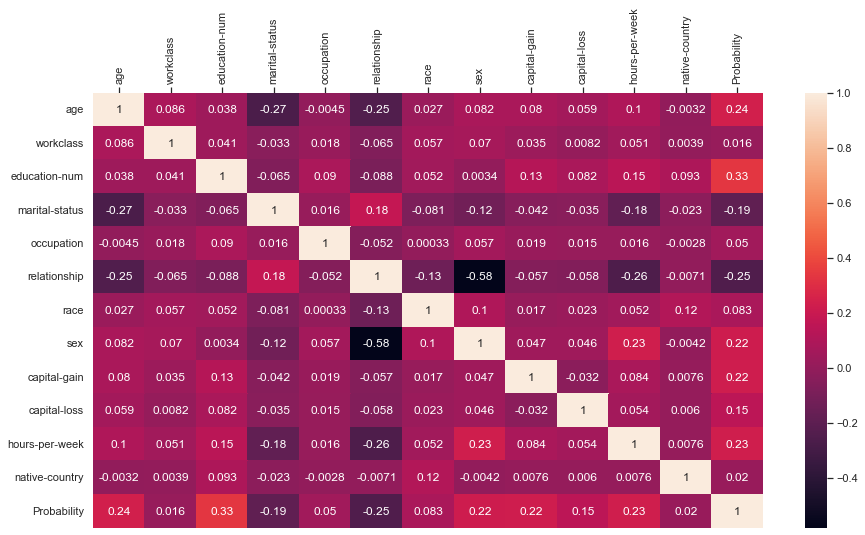

In [18]:
# Get corr matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

df = copy.deepcopy(dataset_orig)
cat_features = list(df.select_dtypes(['object']).columns)
cat_features.remove('sex')
cat_features.remove('race')
cat_features.remove('Probability')

## Encode categorical features
multi = MultiColumnLabelEncoder(columns=cat_features)
df = multi.fit_transform(df)

df['sex'] = np.where(df['sex'] == 'Male', 1, 0)
df['race'] = np.where(df['race'] != 'White', 0, 1)
df['Probability'] = np.where(df['Probability'] == '<=50K', 0, 1)


corr = df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(
    corr,
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    annot=True

)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.xticks(rotation=90)
plt.show()

In [19]:
corr_sex = df[df.columns[0:]].corr().abs()['sex'][:]
print(corr_sex)
corr_output = df[df.columns[0:]].corr().abs()['Probability'][:]
print(corr_output)
features = corr_sex.index
corr_scores = {}
for i in range (0, len(features)):
    corr_scores[features[i]] = statistics.harmonic_mean([corr_sex[i], corr_output[i]])

scores = []
for index, value in corr_scores.items():
    if index!="Probability":
        scores.append((index, value))
print(scores)
scores.sort(key=lambda tup: tup[1], reverse=True)
print(scores[:5])


age               0.082053
workclass         0.069638
education-num     0.003417
marital-status    0.120008
occupation        0.056625
relationship      0.582974
race              0.103308
sex               1.000000
capital-gain      0.047444
capital-loss      0.046457
hours-per-week    0.231425
native-country    0.004170
Probability       0.215760
Name: sex, dtype: float64
age               0.237040
workclass         0.015659
education-num     0.332800
marital-status    0.192711
occupation        0.049787
relationship      0.253402
race              0.083481
sex               0.215760
capital-gain      0.221034
capital-loss      0.148687
hours-per-week    0.227199
native-country    0.020103
Probability       1.000000
Name: Probability, dtype: float64
[('age', 0.12190746443757204), ('workclass', 0.025568807227308914), ('education-num', 0.006765078189683351), ('marital-status', 0.14790810557078135), ('occupation', 0.052986408301317386), ('relationship', 0.3532547129094872), ('race', 0.0

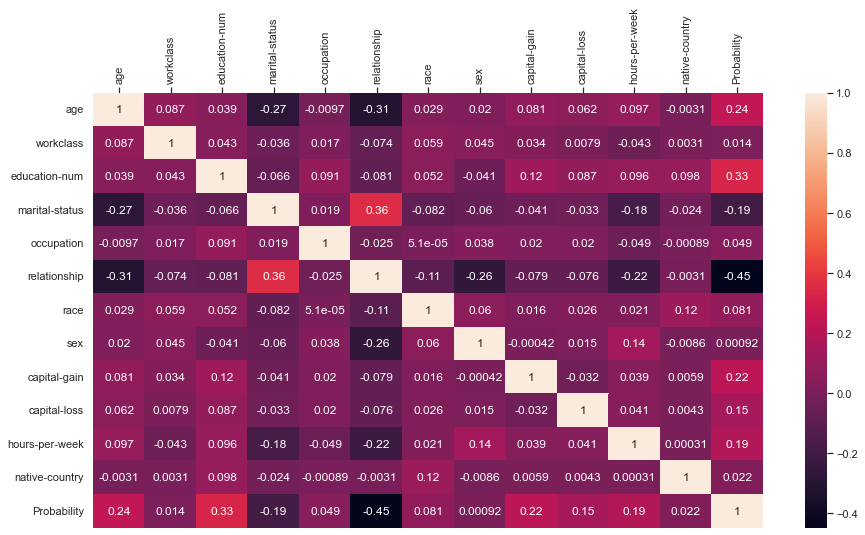

In [20]:
# Get corr matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

dataset_orig = pd.read_csv(Path(r'/Users/germainherbay/PycharmProjects/Blind/adult/mutant/directed/sex_recover/10/sex_recover10_3.csv'))
df = copy.deepcopy(dataset_orig)
cat_features = list(df.select_dtypes(['object']).columns)
cat_features.remove('sex')
cat_features.remove('race')
cat_features.remove('Probability')

## Encode categorical features
multi = MultiColumnLabelEncoder(columns=cat_features)
df = multi.fit_transform(df)

df['sex'] = np.where(df['sex'] == 'Male', 1, 0)
df['race'] = np.where(df['race'] != 'White', 0, 1)
df['Probability'] = np.where(df['Probability'] == '<=50K', 0, 1)


corr = df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(
    corr,
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    annot=True

)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.xticks(rotation=90)
plt.show()

In [21]:
corr_sex = df[df.columns[0:]].corr().abs()['sex'][:]
print(corr_sex)
corr_output = df[df.columns[0:]].corr().abs()['Probability'][:]
print(corr_output)
features = corr_sex.index
corr_scores = {}
for i in range (0, len(features)):
    corr_scores[features[i]] = statistics.harmonic_mean([corr_sex[i], corr_output[i]])

scores = []
for index, value in corr_scores.items():
    if index!="Probability":
        scores.append((index, value))
print(scores)
scores.sort(key=lambda tup: tup[1], reverse=True)
print(scores[:5])


age               0.019567
workclass         0.044844
education-num     0.040940
marital-status    0.060321
occupation        0.037801
relationship      0.256227
race              0.059703
sex               1.000000
capital-gain      0.000417
capital-loss      0.014935
hours-per-week    0.144425
native-country    0.008589
Probability       0.000917
Name: sex, dtype: float64
age               0.238783
workclass         0.013643
education-num     0.332130
marital-status    0.192834
occupation        0.049393
relationship      0.448481
race              0.080944
sex               0.000917
capital-gain      0.220009
capital-loss      0.148359
hours-per-week    0.185335
native-country    0.022385
Probability       1.000000
Name: Probability, dtype: float64
[('age', 0.03617076719195834), ('workclass', 0.020921381293979368), ('education-num', 0.0728951552911529), ('marital-status', 0.0918962973159792), ('occupation', 0.04282622289690373), ('relationship', 0.32612963228873126), ('race', 0.0687